## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.752373  0.449003 -0.885347  0.068309 -1.304633 -1.482616
1  1.099353  1.153214 -1.369435  1.221743 -1.085567  1.222756
2  0.141056  0.467776  0.442885  0.209637  0.386213  0.881620
3 -1.035733 -0.949986  0.404500  0.902457  0.020604 -0.489427
4 -1.338408 -0.263781 -1.793146  0.996271  1.889588  1.109957


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9470272	total: 57.4ms	remaining: 57.4s
1:	learn: 0.9395391	total: 58.2ms	remaining: 29s
2:	learn: 0.9300108	total: 58.8ms	remaining: 19.5s
3:	learn: 0.9209718	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9121712	total: 59.8ms	remaining: 11.9s
5:	learn: 0.9031162	total: 60.3ms	remaining: 9.99s
6:	learn: 0.8947530	total: 60.9ms	remaining: 8.63s
7:	learn: 0.8878404	total: 61.4ms	remaining: 7.62s
8:	learn: 0.8800491	total: 61.9ms	remaining: 6.81s
9:	learn: 0.8718836	total: 62.6ms	remaining: 6.2s
10:	learn: 0.8629491	total: 63.2ms	remaining: 5.68s
11:	learn: 0.8543278	total: 63.7ms	remaining: 5.25s
12:	learn: 0.8465327	total: 64.2ms	remaining: 4.88s
13:	learn: 0.8397504	total: 64.7ms	remaining: 4.55s
14:	learn: 0.8315746	total: 65.1ms	remaining: 4.28s
15:	learn: 0.8238400	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8162662	total: 66.3ms	remaining: 3.83s
17:	learn: 0.8099050	total: 66.8ms	remaining: 3.64s
18:	learn: 0.8025886	total: 67.3ms	remaining: 3

105:	learn: 0.4097686	total: 109ms	remaining: 917ms
106:	learn: 0.4072294	total: 109ms	remaining: 912ms
107:	learn: 0.4042582	total: 110ms	remaining: 907ms
108:	learn: 0.4017093	total: 110ms	remaining: 901ms
109:	learn: 0.3987512	total: 111ms	remaining: 894ms
110:	learn: 0.3958510	total: 111ms	remaining: 889ms
111:	learn: 0.3930340	total: 111ms	remaining: 883ms
112:	learn: 0.3901595	total: 112ms	remaining: 878ms
113:	learn: 0.3878892	total: 112ms	remaining: 873ms
114:	learn: 0.3848634	total: 113ms	remaining: 868ms
115:	learn: 0.3825952	total: 113ms	remaining: 862ms
116:	learn: 0.3799041	total: 114ms	remaining: 857ms
117:	learn: 0.3772427	total: 114ms	remaining: 854ms
118:	learn: 0.3742613	total: 115ms	remaining: 849ms
119:	learn: 0.3718829	total: 115ms	remaining: 844ms
120:	learn: 0.3701635	total: 116ms	remaining: 840ms
121:	learn: 0.3679163	total: 116ms	remaining: 835ms
122:	learn: 0.3657064	total: 116ms	remaining: 830ms
123:	learn: 0.3632522	total: 117ms	remaining: 825ms
124:	learn: 

201:	learn: 0.2316422	total: 152ms	remaining: 602ms
202:	learn: 0.2304972	total: 153ms	remaining: 600ms
203:	learn: 0.2290903	total: 153ms	remaining: 599ms
204:	learn: 0.2277665	total: 154ms	remaining: 597ms
205:	learn: 0.2263254	total: 154ms	remaining: 595ms
206:	learn: 0.2251209	total: 155ms	remaining: 593ms
207:	learn: 0.2244822	total: 155ms	remaining: 592ms
208:	learn: 0.2233888	total: 156ms	remaining: 589ms
209:	learn: 0.2226581	total: 156ms	remaining: 588ms
210:	learn: 0.2212111	total: 157ms	remaining: 586ms
211:	learn: 0.2206427	total: 157ms	remaining: 585ms
212:	learn: 0.2192880	total: 158ms	remaining: 583ms
213:	learn: 0.2186713	total: 158ms	remaining: 581ms
214:	learn: 0.2174149	total: 159ms	remaining: 579ms
215:	learn: 0.2160121	total: 159ms	remaining: 577ms
216:	learn: 0.2148622	total: 160ms	remaining: 576ms
217:	learn: 0.2135751	total: 160ms	remaining: 574ms
218:	learn: 0.2125276	total: 160ms	remaining: 572ms
219:	learn: 0.2114007	total: 161ms	remaining: 571ms
220:	learn: 

363:	learn: 0.1011834	total: 228ms	remaining: 398ms
364:	learn: 0.1007334	total: 229ms	remaining: 398ms
365:	learn: 0.1000227	total: 229ms	remaining: 397ms
366:	learn: 0.0993269	total: 230ms	remaining: 396ms
367:	learn: 0.0989291	total: 230ms	remaining: 395ms
368:	learn: 0.0984981	total: 231ms	remaining: 394ms
369:	learn: 0.0977297	total: 231ms	remaining: 394ms
370:	learn: 0.0975102	total: 232ms	remaining: 393ms
371:	learn: 0.0968063	total: 232ms	remaining: 392ms
372:	learn: 0.0960588	total: 233ms	remaining: 391ms
373:	learn: 0.0953954	total: 233ms	remaining: 390ms
374:	learn: 0.0951756	total: 234ms	remaining: 389ms
375:	learn: 0.0946623	total: 234ms	remaining: 389ms
376:	learn: 0.0941309	total: 235ms	remaining: 388ms
377:	learn: 0.0937362	total: 235ms	remaining: 387ms
378:	learn: 0.0930384	total: 236ms	remaining: 386ms
379:	learn: 0.0924665	total: 236ms	remaining: 385ms
380:	learn: 0.0918371	total: 236ms	remaining: 384ms
381:	learn: 0.0911693	total: 237ms	remaining: 383ms
382:	learn: 

557:	learn: 0.0382718	total: 319ms	remaining: 253ms
558:	learn: 0.0380945	total: 320ms	remaining: 252ms
559:	learn: 0.0379688	total: 320ms	remaining: 252ms
560:	learn: 0.0377964	total: 321ms	remaining: 251ms
561:	learn: 0.0376880	total: 321ms	remaining: 250ms
562:	learn: 0.0375687	total: 322ms	remaining: 250ms
563:	learn: 0.0373859	total: 322ms	remaining: 249ms
564:	learn: 0.0372818	total: 322ms	remaining: 248ms
565:	learn: 0.0371682	total: 323ms	remaining: 247ms
566:	learn: 0.0369901	total: 323ms	remaining: 247ms
567:	learn: 0.0368847	total: 324ms	remaining: 246ms
568:	learn: 0.0367101	total: 324ms	remaining: 246ms
569:	learn: 0.0365842	total: 325ms	remaining: 245ms
570:	learn: 0.0365010	total: 325ms	remaining: 244ms
571:	learn: 0.0363791	total: 326ms	remaining: 244ms
572:	learn: 0.0362811	total: 326ms	remaining: 243ms
573:	learn: 0.0361628	total: 326ms	remaining: 242ms
574:	learn: 0.0360828	total: 327ms	remaining: 242ms
575:	learn: 0.0359683	total: 327ms	remaining: 241ms
576:	learn: 

751:	learn: 0.0183481	total: 412ms	remaining: 136ms
752:	learn: 0.0182624	total: 413ms	remaining: 135ms
753:	learn: 0.0182093	total: 413ms	remaining: 135ms
754:	learn: 0.0181531	total: 414ms	remaining: 134ms
755:	learn: 0.0180578	total: 414ms	remaining: 134ms
756:	learn: 0.0179749	total: 414ms	remaining: 133ms
757:	learn: 0.0179235	total: 415ms	remaining: 132ms
758:	learn: 0.0178523	total: 415ms	remaining: 132ms
759:	learn: 0.0178246	total: 416ms	remaining: 131ms
760:	learn: 0.0177741	total: 416ms	remaining: 131ms
761:	learn: 0.0177025	total: 417ms	remaining: 130ms
762:	learn: 0.0176323	total: 417ms	remaining: 130ms
763:	learn: 0.0176065	total: 418ms	remaining: 129ms
764:	learn: 0.0175379	total: 418ms	remaining: 129ms
765:	learn: 0.0175127	total: 419ms	remaining: 128ms
766:	learn: 0.0174379	total: 419ms	remaining: 127ms
767:	learn: 0.0174113	total: 420ms	remaining: 127ms
768:	learn: 0.0173618	total: 420ms	remaining: 126ms
769:	learn: 0.0172795	total: 421ms	remaining: 126ms
770:	learn: 

938:	learn: 0.0093615	total: 503ms	remaining: 32.7ms
939:	learn: 0.0093344	total: 504ms	remaining: 32.1ms
940:	learn: 0.0092828	total: 504ms	remaining: 31.6ms
941:	learn: 0.0092611	total: 504ms	remaining: 31.1ms
942:	learn: 0.0092324	total: 505ms	remaining: 30.5ms
943:	learn: 0.0091982	total: 505ms	remaining: 30ms
944:	learn: 0.0091860	total: 506ms	remaining: 29.4ms
945:	learn: 0.0091349	total: 506ms	remaining: 28.9ms
946:	learn: 0.0091229	total: 506ms	remaining: 28.3ms
947:	learn: 0.0090719	total: 507ms	remaining: 27.8ms
948:	learn: 0.0090601	total: 507ms	remaining: 27.3ms
949:	learn: 0.0090109	total: 508ms	remaining: 26.7ms
950:	learn: 0.0089644	total: 508ms	remaining: 26.2ms
951:	learn: 0.0089260	total: 509ms	remaining: 25.6ms
952:	learn: 0.0088807	total: 509ms	remaining: 25.1ms
953:	learn: 0.0088432	total: 510ms	remaining: 24.6ms
954:	learn: 0.0088183	total: 510ms	remaining: 24ms
955:	learn: 0.0087976	total: 511ms	remaining: 23.5ms
956:	learn: 0.0087530	total: 511ms	remaining: 23ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

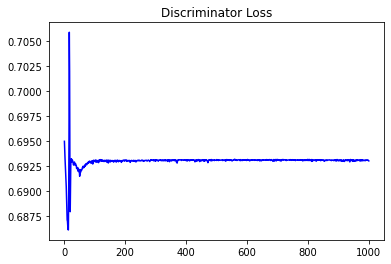

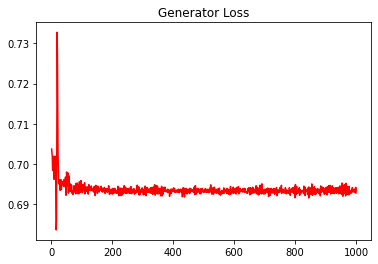

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15706017154270707


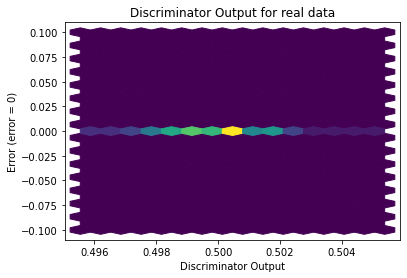

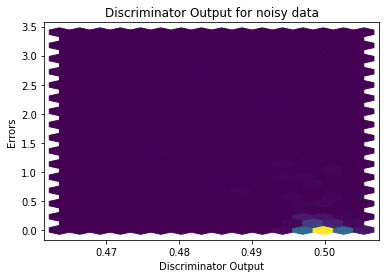

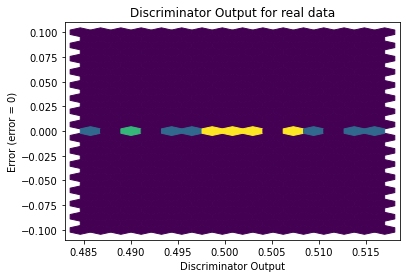

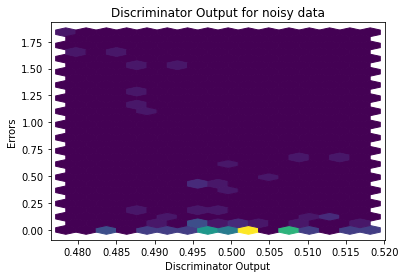

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


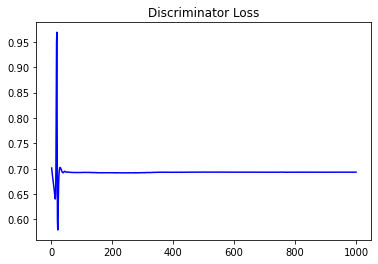

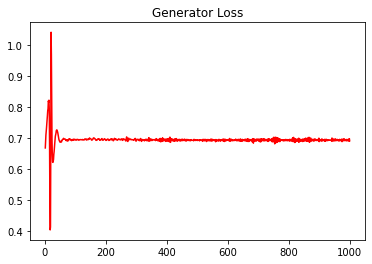

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2689462496547022


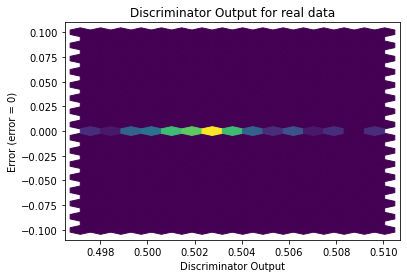

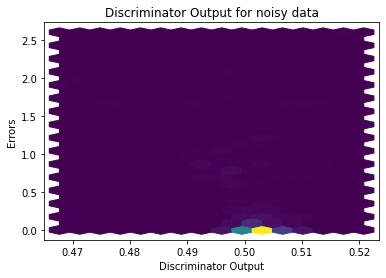

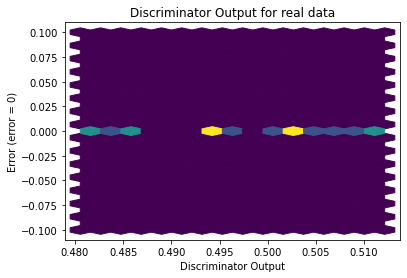

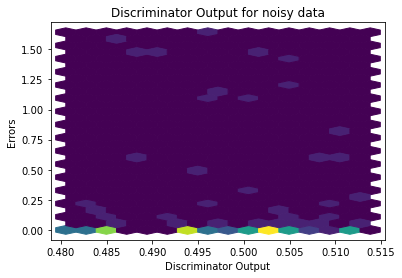

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0693]], requires_grad=True)
